In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

from utils import *
%matplotlib inline

In [2]:
cayley_values = dict()
coord_values = np.arange(start=3,stop=25,step=1)
#depth_values = [2,3,4,5,6]
depth = 3
for coord in coord_values:
    print(f'####Calculating for coord={coord}####')
    G = create_cayley_tree(coord, depth)
    n = nx.number_of_nodes(G)
    ratio = calculate_leaf_ratio(G)
    H,_ = calculate_H(G)
    
    cayley_values[coord] =  {'H':H, 'ratio':ratio}
    print(f'Graph with n={n} and ratio:{ratio} H:{H}')


cayley_df = pd.DataFrame(cayley_values).T
cayley_df = cayley_df.reset_index(drop=False).rename(columns={'index': 'coord'})
cayley_df.to_csv("SavedNetworks/cayley.csv")
cayley_df

####Calculating for coord=3####
Graph with n=22 and ratio:1.2 H:0.137
####Calculating for coord=4####
Graph with n=53 and ratio:2.12 H:0.20599999999999996
####Calculating for coord=5####
Graph with n=106 and ratio:3.08 H:0.251
####Calculating for coord=6####
Graph with n=187 and ratio:4.05 H:0.28400000000000003
####Calculating for coord=7####
Graph with n=302 and ratio:5.04 H:0.30800000000000005
####Calculating for coord=8####
Graph with n=457 and ratio:6.03 H:0.32699999999999996
####Calculating for coord=9####
Graph with n=658 and ratio:7.02 H:0.34199999999999997
####Calculating for coord=10####
Graph with n=911 and ratio:8.02 H:0.354
####Calculating for coord=11####
Graph with n=1222 and ratio:9.02 H:0.365
####Calculating for coord=12####
Graph with n=1597 and ratio:10.01 H:0.374
####Calculating for coord=13####
Graph with n=2042 and ratio:11.01 H:0.381
####Calculating for coord=14####
Graph with n=2563 and ratio:12.01 H:0.388
####Calculating for coord=15####
Graph with n=3166 and ra

,coord,H,ratio
0,3,0.137,1.20
1,4,0.206,2.12
2,5,0.251,3.08
3,6,0.284,4.05
4,7,0.308,5.04
5,8,0.327,6.03
6,9,0.342,7.02
7,10,0.354,8.02
8,11,0.365,9.02
9,12,0.374,10.01


In [2]:
cayley_df = pd.read_csv("SavedNetworks/cayley.csv")

In [ ]:
cayley_values = dict()
coord_values = np.arange(start=3,stop=25,step=1)
#depth_values = [2,3,4,5,6]
depth = 3
for coord in coord_values:
    print(f'####Calculating for coord={coord}####')
    G = create_cayley_tree(coord, depth)
    n = nx.number_of_nodes(G)
    ratio = calculate_leaf_ratio(G)
    gini = calculate_gini(G)
    estrada = estrada_index(G)

    cayley_values[coord] =  {'gini':gini, 'ratio':ratio, 'estrada': estrada}
    print(f'Graph with n={n} and ratio:{ratio} gini:{gini}')

    
cayley_df__ = pd.DataFrame(cayley_values).T
cayley_df__ = cayley_df__.reset_index(drop=False).rename(columns={'index': 'coord'})
cayley_df__.to_csv("SavedNetworks/cayley__.csv")
cayley_df__

In [3]:
cayley_df__ = pd.read_csv("SavedNetworks/cayley__.csv")

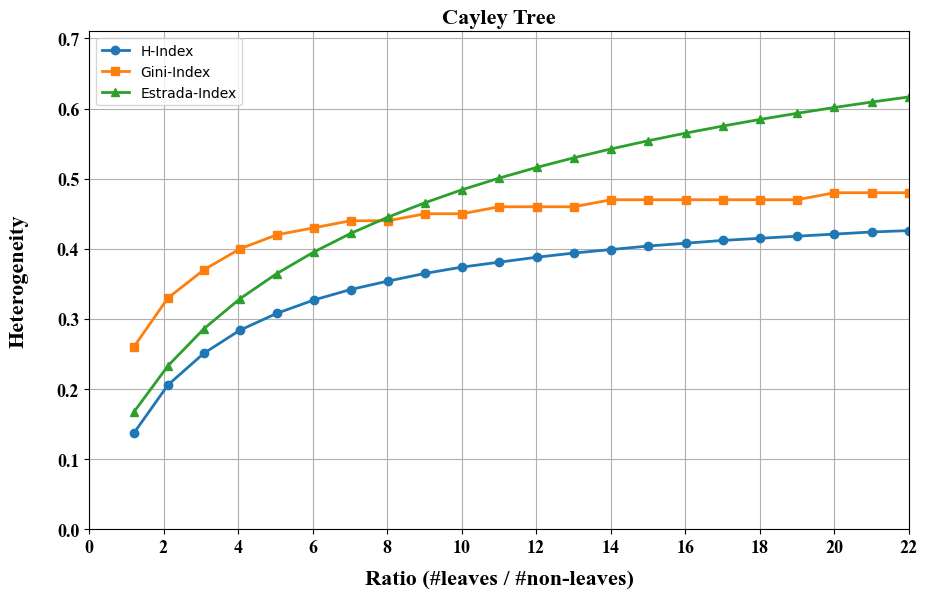

In [4]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

# Plot H
plt.plot(
    cayley_df['ratio'],
    cayley_df['H'],
    marker='o',
    label='H-Index',
    linewidth=2,
    markersize=6,
    color='C0'
)

# Plot Gini
plt.plot(
    cayley_df__['ratio'],
    cayley_df__['gini'],
    marker='s',
    label='Gini-Index',
    linewidth=2,
    markersize=6,
    color='C1'
)

# Plot Estrada
plt.plot(
    cayley_df__['ratio'],
    cayley_df__['estrada'],
    marker='^',
    label='Estrada-Index',
    linewidth=2,
    markersize=6,
    color='C2'
)
plt.subplots_adjust(left=0.13, bottom=0.12, right=0.95, top=0.95)

# Labels
plt.title("Cayley Tree", family= 'times new roman', weight='bold', size=16)
plt.xlabel('Ratio (#leaves / #non-leaves)', family= 'times new roman', weight='bold', size=16, labelpad=10)
plt.ylabel('Heterogeneity', family= 'times new roman', weight='bold', size=16, labelpad=20)
# Legend
plt.legend(loc=2)

plt.xticks(np.arange(0,23,2),family='times new roman', weight='bold', size=13)
plt.xlim(0, 22)
plt.yticks(np.arange(0, 0.71, 0.1),family='times new roman', weight='bold', size=13)
plt.grid()
plt.ylim(0,0.71)
plt.savefig("Figures/cayley_heterogeneity_ratio.png", dpi=1000, bbox_inches='tight')
plt.show()

In [7]:
cayley_values = dict()
coord_values = [3,4,5,6,7]
depth_values = [2,3,4,5,6]

for coord in coord_values:
    print(f'####Calculating for coord={coord}####')
    for depth in range(2, 11-coord):
        print(f'----------Depth:{depth}------------')
        G = create_cayley_tree(coord, depth)
        n = nx.number_of_nodes(G)
        degrees = np.sort(list(dict(G.degree).values()))
        ratio = calculate_leaf_ratio(G)
        cayley_values[str(ratio)] =  {'H':0, 'coord':coord}
        H,_ = calculate_H(G)
        gini = calculate_gini(G)
        estrada = estrada_index(G)
        cayley_values[str(ratio)]['H'] = H
        cayley_values[str(ratio)]['gini'] = gini

        cayley_values[str(ratio)]['estrada'] = estrada


        print(f'Graph with n={n} and ratio:{ratio} H:{H}')

cayley_df__second = pd.DataFrame(cayley_values).T
cayley_df__second = cayley_df__second.reset_index(drop=False).rename(columns={'index': 'ratio'})
cayley_df__second.to_csv("SavedNetworks/cayley_df__second.csv")
cayley_df__second

####Calculating for coord=3####
----------Depth:2------------
Graph with n=10 and ratio:1.5 H:0.138
----------Depth:3------------
Graph with n=22 and ratio:1.2 H:0.137
----------Depth:4------------
Graph with n=46 and ratio:1.09 H:0.136
----------Depth:5------------
Graph with n=94 and ratio:1.04 H:0.135
----------Depth:6------------
Graph with n=190 and ratio:1.02 H:0.135
----------Depth:7------------
Graph with n=382 and ratio:1.01 H:0.135
####Calculating for coord=4####
----------Depth:2------------
Graph with n=17 and ratio:2.4 H:0.20199999999999996
----------Depth:3------------
Graph with n=53 and ratio:2.12 H:0.20599999999999996
----------Depth:4------------
Graph with n=161 and ratio:2.04 H:0.20599999999999996
----------Depth:5------------
Graph with n=485 and ratio:2.01 H:0.20699999999999996
----------Depth:6------------
Graph with n=1457 and ratio:2.0 H:0.20699999999999996
####Calculating for coord=5####
----------Depth:2------------
Graph with n=26 and ratio:3.33 H:0.247
----

,ratio,H,coord,gini,estrada
0,1.5,0.138,3.0,0.27,0.267949
1,1.2,0.137,3.0,0.26,0.167014
2,1.09,0.136,3.0,0.26,0.131575
3,1.04,0.135,3.0,0.25,0.114765
4,1.02,0.135,3.0,0.25,0.105528
5,1.01,0.135,3.0,0.25,0.100004
6,2.4,0.202,4.0,0.33,0.333333
7,2.12,0.206,4.0,0.33,0.233295
8,2.04,0.206,4.0,0.33,0.198966
9,2.01,0.207,4.0,0.33,0.183673


In [4]:
cayley_df__second = pd.read_csv("SavedNetworks/cayley_df__second.csv")

In [9]:
cayley_values = dict()
coord_values = [3,4,5,6,7]

for coord in coord_values:
    print(f'####Calculating for coord={coord}####')
    for depth in range(2, 11-coord):
        print(f'----------Depth:{depth}------------')

        G = create_cayley_tree(coord, depth)
        n = nx.number_of_nodes(G)

        ratio = calculate_leaf_ratio(G)
        H, _ = calculate_H(G)
        gini = calculate_gini(G)
        estrada = estrada_index(G)

        key = (coord, depth)

        cayley_values[key] = {
            'coord': coord,
            'depth': depth,
            'ratio': ratio,
            'H': H,
            'gini': gini,
            'estrada': estrada
        }

        print(f'Graph with n={n} | depth={depth} | ratio:{ratio} | H:{H}')

cayley_df__third = pd.DataFrame.from_dict(cayley_values, orient='index')
cayley_df__third = cayley_df__third.reset_index(drop=True)
cayley_df__third.to_csv("SavedNetworks/cayley_df__third.csv")
cayley_df__third


####Calculating for coord=3####
----------Depth:2------------
Graph with n=10 | depth=2 | ratio:1.5 | H:0.138
----------Depth:3------------
Graph with n=22 | depth=3 | ratio:1.2 | H:0.137
----------Depth:4------------
Graph with n=46 | depth=4 | ratio:1.09 | H:0.136
----------Depth:5------------
Graph with n=94 | depth=5 | ratio:1.04 | H:0.135
----------Depth:6------------
Graph with n=190 | depth=6 | ratio:1.02 | H:0.135
----------Depth:7------------
Graph with n=382 | depth=7 | ratio:1.01 | H:0.135
####Calculating for coord=4####
----------Depth:2------------
Graph with n=17 | depth=2 | ratio:2.4 | H:0.20199999999999996
----------Depth:3------------
Graph with n=53 | depth=3 | ratio:2.12 | H:0.20599999999999996
----------Depth:4------------
Graph with n=161 | depth=4 | ratio:2.04 | H:0.20599999999999996
----------Depth:5------------
Graph with n=485 | depth=5 | ratio:2.01 | H:0.20699999999999996
----------Depth:6------------
Graph with n=1457 | depth=6 | ratio:2.0 | H:0.2069999999999

,coord,depth,ratio,H,gini,estrada
0,3,2,1.50,0.138,0.27,0.267949
1,3,3,1.20,0.137,0.26,0.167014
2,3,4,1.09,0.136,0.26,0.131575
3,3,5,1.04,0.135,0.25,0.114765
4,3,6,1.02,0.135,0.25,0.105528
5,3,7,1.01,0.135,0.25,0.100004
6,4,2,2.40,0.202,0.33,0.333333
7,4,3,2.12,0.206,0.33,0.233295
8,4,4,2.04,0.206,0.33,0.198966
9,4,5,2.01,0.207,0.33,0.183673


In [5]:
cayley_df__third = pd.read_csv("SavedNetworks/cayley_df__third.csv")

<Figure size 1000x600 with 0 Axes>

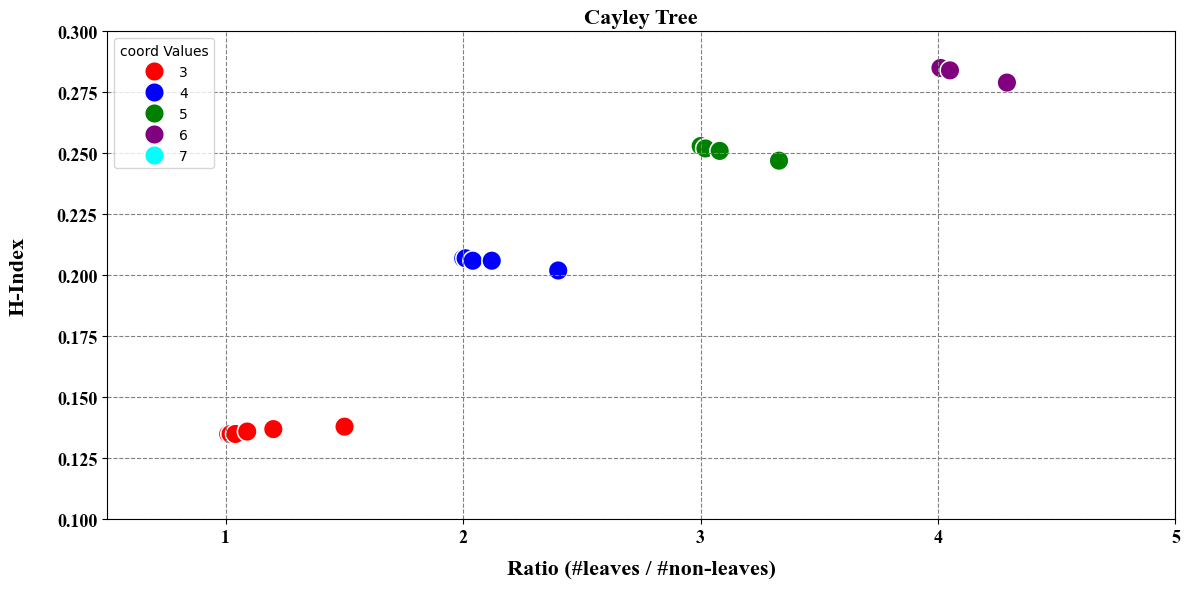

In [7]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}

cayley_df__third.sort_values(by=['ratio'], inplace=True)
font_size = 14

custom_palette = {
    3: "red",
    4: "blue",
    5: "green",
    6: 'purple',
    7: 'cyan'
}

plt.figure(figsize=(12,6))
sns.scatterplot(data=cayley_df__third, x="ratio", y="H", hue='coord', palette=custom_palette, s=200)
plt.subplots_adjust(left=0.13, bottom=0.12, right=0.95, top=0.95)

plt.title("Cayley Tree", family= 'times new roman', weight='bold', size=16)
plt.xlabel('Ratio (#leaves / #non-leaves)', family= 'times new roman', weight='bold', size=16, labelpad=10)
plt.ylabel('H-Index', family= 'times new roman', weight='bold', size=16, labelpad=20)

# plt.yticks(fontsize=font_size)
plt.legend(title='coord Values', loc=2)
plt.xticks(np.arange(0,7,1),family='times new roman', weight='bold', size=13)
plt.xlim(0.5, 5)
plt.yticks(np.arange(0, 0.31, 0.025),family='times new roman', weight='bold', size=13)
plt.ylim(0.1,0.3)
plt.grid(color='grey',linestyle='--',axis='both')
plt.tight_layout()
plt.savefig('Figures/h_ratio_cayley.png', facecolor='white', dpi=1000, bbox_inches='tight')
plt.show()



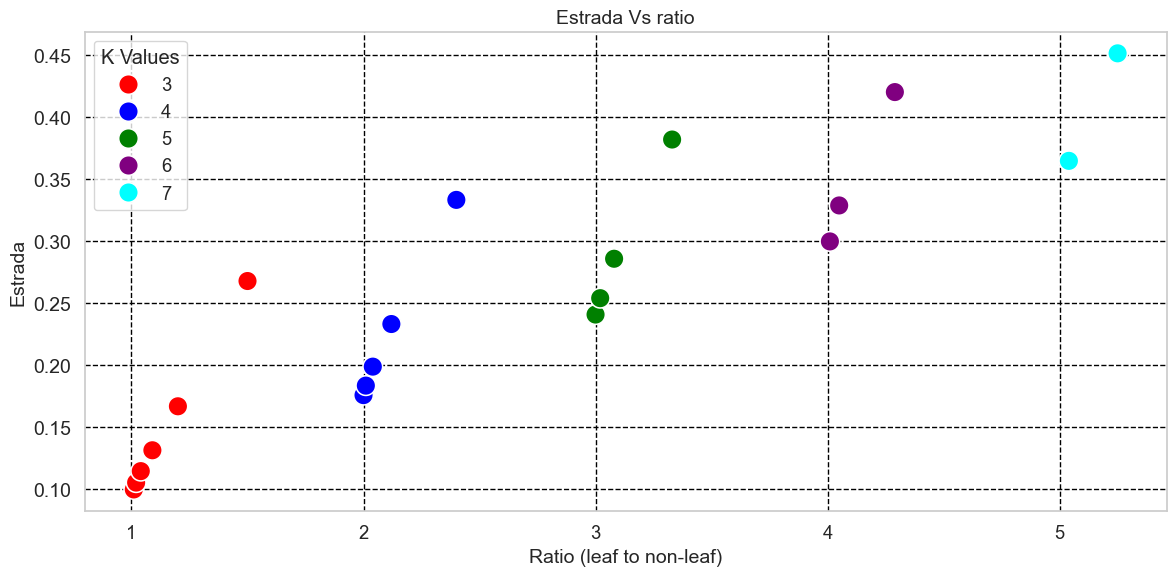

In [12]:
cayley_df__third.sort_values(by=['ratio'], inplace=True)
font_size = 14

custom_palette = {
    3: "red",
    4: "blue",
    5: "green",
    6: 'purple',
    7: 'cyan'
}

plt.figure(figsize=(12,6))
sns.scatterplot(data=cayley_df__third, x="ratio", y="estrada", hue='coord', palette=custom_palette, s=200)

plt.xlabel('Ratio (leaf to non-leaf)', fontsize=font_size)
plt.ylabel('Estrada',fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(title='K Values')
plt.title('Estrada Vs ratio', fontsize=font_size)
plt.grid(color='black',linestyle='--',axis='both')
plt.tight_layout()
plt.savefig('Plots/estrada_cayley.png', facecolor='white', dpi=300, bbox_inches='tight')
plt.show()


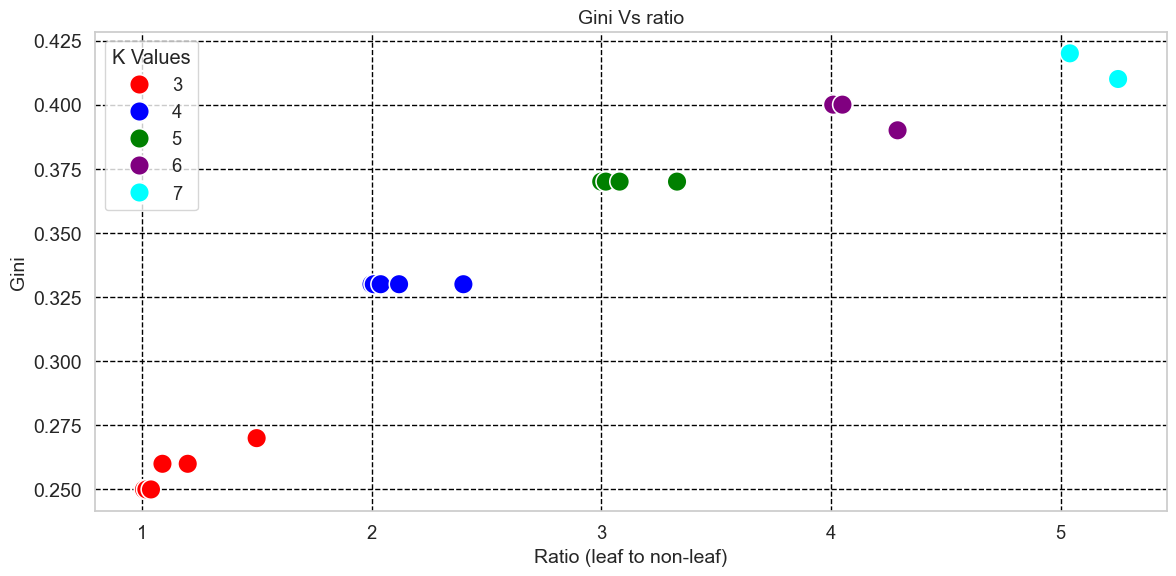

In [13]:
cayley_df__third.sort_values(by=['ratio'], inplace=True)
font_size = 14

custom_palette = {
    3: "red",
    4: "blue",
    5: "green",
    6: 'purple',
    7: 'cyan'
}

plt.figure(figsize=(12,6))
sns.scatterplot(data=cayley_df__third, x="ratio", y="gini", hue='coord', palette=custom_palette, s=200)

plt.xlabel('Ratio (leaf to non-leaf)', fontsize=font_size)
plt.ylabel('Gini',fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(title='K Values')
plt.title('Gini Vs ratio', fontsize=font_size)
plt.grid(color='black',linestyle='--',axis='both')
plt.tight_layout()
plt.savefig('Plots/gini_cayley.png', facecolor='white', dpi=300, bbox_inches='tight')
plt.show()


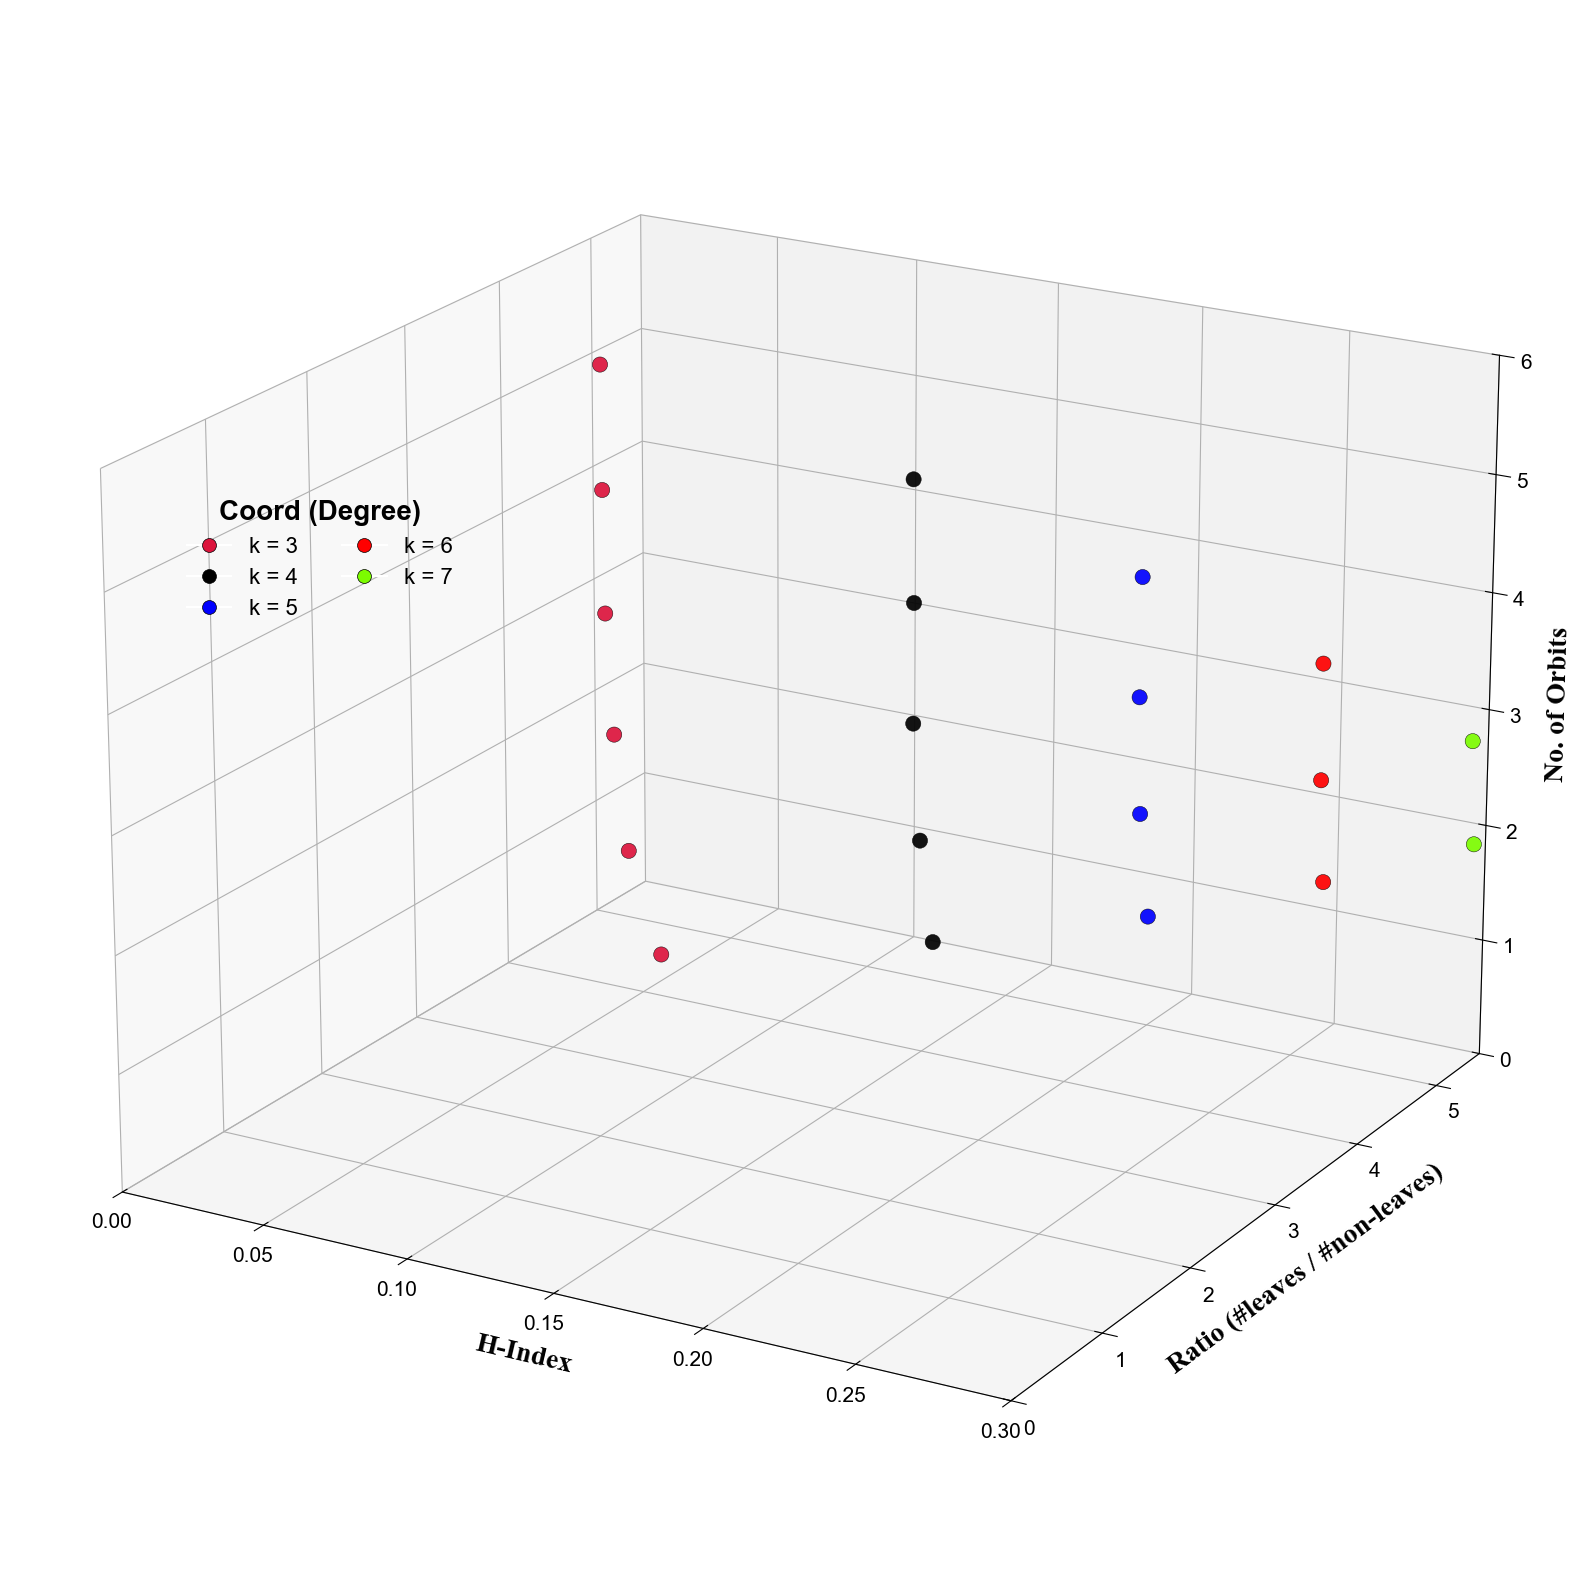

In [17]:
# fig = plt.figure(figsize=(24,16))
fig = plt.figure(figsize=(16,17))

ax = fig.add_subplot(111, projection='3d')

cayley_df__third['ratio'] = cayley_df__third['ratio'].astype(float)
cayley_df__third['coord'] = cayley_df__third['coord'].astype(int)
cayley_df__third['depth'] = cayley_df__third['depth'].astype(int)


mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'axes.linewidth': 0.8,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})


categories = sorted(cayley_df__third['coord'].unique())


palette = sns.color_palette("colorblind", n_colors=len(categories))
color_dict = {np.int64(3): 'crimson', np.int64(4):'black', np.int64(5): 'blue', np.int64(6): 'red', np.int64(7): 'lawngreen'}

xs = cayley_df__third['H']
ys = cayley_df__third['ratio']
zs = cayley_df__third['depth']

colors = cayley_df__third['coord'].map(color_dict)

scatter = ax.scatter(
    xs, ys, zs,
    c=colors,
    s=120,
    edgecolor='black',
    linewidth=0.35,
    alpha=0.92
)

ax.set_xlabel('H-Index',
              fontfamily='Times New Roman',
              weight='bold',
              fontsize=14,
              labelpad=10)  

ax.set_ylabel('Ratio (#leaves / #non-leaves)',
              fontfamily='Times New Roman',
              weight='bold',
              fontsize=14,
              labelpad=15)

ax.set_zlabel('Depth',
              fontfamily='Times New Roman',
              weight='bold',
              fontsize=14,
              labelpad=-0.5)


ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='z', labelsize=13)

legend_elements = [
    Line2D(
        [0], [0], marker='o', color='w', label=f'k = {cat}',
        markerfacecolor=color_dict[cat], markersize=10,
        markeredgecolor='black', markeredgewidth=0.5
    )
    for cat in categories
]

legend = ax.legend(
    handles=legend_elements,
    title='Coord (Degree)',
    title_fontsize=20,
    fontsize=16,
    frameon=False,
    loc='upper left',
    ncol=2,
    bbox_to_anchor=(0.1, 0.7)
)


ax.view_init(elev=25, azim=-60)
legend.get_title().set_weight('semibold')

ax.view_init(elev=20, azim=-60)
ax.grid(True, color='gray', linestyle=':', alpha=0.4)
ax.set_xlabel('H-Index', fontsize=20, labelpad=12)
ax.set_ylabel('Ratio (#leaves / #non-leaves)', fontsize=20, labelpad=12)
ax.set_zlabel('No. of Orbits', fontsize=20, labelpad=10)

ax.set_xlim(left=0., right=0.3)
ax.set_ylim(bottom=0)

ax.set_zlim(bottom=0, top=6)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)
plt.savefig('Figures/3d_cayley_v2.png', facecolor='white', dpi=1000, bbox_inches='tight')

plt.tight_layout(pad=1.2)
plt.show()


In [19]:
supernova_values = []

clique_values = [3,4,5,6,7,8]   

for clique in tqdm(clique_values):
    min_leaf = max(3, 100 - clique) 
    leaf_values = np.arange(min_leaf, min_leaf + 25)  

    for leaf in leaf_values:
        G = create_supernova(clique, leaf)
        n = nx.number_of_nodes(G)

        ratio = leaf / clique  # leaf / non-leaf
        H, _ = calculate_H(G)
        gini = calculate_gini(G)
        estrada = estrada_index(G)

        supernova_values.append({
            'clique': clique,
            'leaf': leaf,
            'nodes': n,
            'ratio': ratio,
            'H': H,
            'gini': gini,
            'estrada': estrada,
        })

supernova_df = pd.DataFrame(supernova_values)
supernova_df.to_csv("SavedNetworks/supernova_df.csv", index=False)
supernova_df

100%|██████████| 6/6 [00:01<00:00,  3.25it/s]


,clique,leaf,nodes,ratio,H,gini,estrada
0,3,97,100,32.333333,0.434,0.48,0.826069
1,3,98,101,32.666667,0.434,0.48,0.827059
2,3,99,102,33.000000,0.435,0.48,0.828034
3,3,100,103,33.333333,0.435,0.48,0.828993
4,3,101,104,33.666667,0.436,0.48,0.829938
...,...,...,...,...,...,...,...
145,8,112,120,14.000000,0.379,0.45,0.625878
146,8,113,121,14.125000,0.379,0.45,0.627507
147,8,114,122,14.250000,0.380,0.45,0.629116
148,8,115,123,14.375000,0.381,0.45,0.630705


In [9]:
supernova_df = pd.read_csv("SavedNetworks/supernova_df.csv")

<Figure size 1000x600 with 0 Axes>

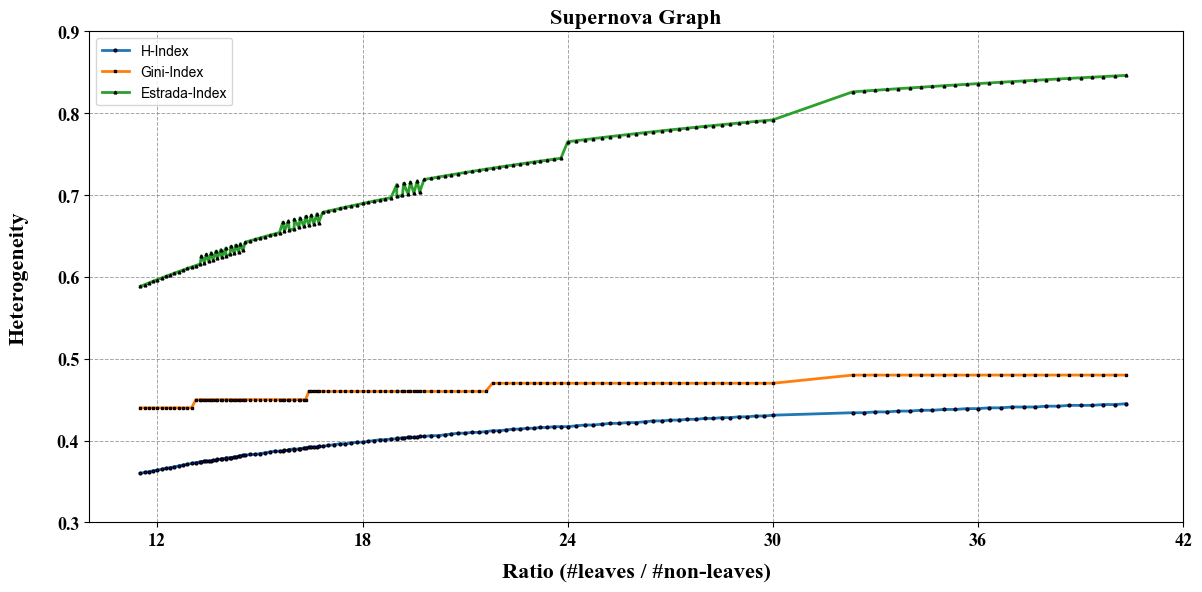

In [10]:
plt.figure(figsize=(10, 6))
font = {'family': 'times new roman', 'weight': 'bold', 'size': 11}
marker_size=2
supernova_df.sort_values(by=['ratio'], inplace=True)


font_size = 14
plt.figure(figsize=(12, 6))


plt.plot(
    supernova_df['ratio'],
    supernova_df['H'],
    marker='o',
    markeredgecolor='black',
    markerfacecolor='blue',
    linewidth=2,
    markersize=marker_size,
    label='H-Index'
)

plt.plot(
    supernova_df['ratio'],
    supernova_df['gini'],
    marker='s',
    markeredgecolor='black',
    markerfacecolor='red',
    linewidth=2,
    markersize=marker_size,
    label='Gini-Index'
)

plt.plot(
    supernova_df['ratio'],
    supernova_df['estrada'],
    marker='^',
    markeredgecolor='black',
    markerfacecolor='green',
    linewidth=2,
    markersize=marker_size,
    label='Estrada-Index'
)
plt.subplots_adjust(left=0.13, bottom=0.12, right=0.95, top=0.95)


plt.title("Supernova Graph", family= 'times new roman', weight='bold', size=16)
plt.xlabel('Ratio (#leaves / #non-leaves)', family= 'times new roman', weight='bold', size=16, labelpad=10)
plt.ylabel('Heterogeneity', family= 'times new roman', weight='bold', size=16, labelpad=20)
# Legend
plt.legend(loc=2)
plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

plt.xticks(np.arange(0,43,6),family='times new roman', weight='bold', size=13)
plt.xlim(10, 42)
plt.yticks(np.arange(0, 1, 0.1),family='times new roman', weight='bold', size=13)
plt.ylim(0.3,0.9)

plt.savefig('Figures/supernova_combined.png', facecolor='white', dpi=1000, bbox_inches='tight')
plt.show()

In [22]:
def create_supernova(clique, leaf):
    g = nx.complete_graph(clique)
    new_nodes = range(clique, clique + leaf)
    g.add_nodes_from(new_nodes)
    
    for new_node in new_nodes:
        for clique_node in range(clique):
            g.add_edge(new_node, clique_node)
    return g

supernova_values = []

clique_values = [3,4,5,6,7,8]   
leaf_values = np.arange(3, 150) 

for clique in tqdm(clique_values):
    for leaf in leaf_values:
        G = create_supernova(clique, leaf)
        n = nx.number_of_nodes(G)
        ratio = leaf / clique  # leaf / non-leaf
        H, _ = calculate_H(G)
        gini = calculate_gini(G)
        estrada = estrada_index(G)

        supernova_values.append({
            'clique': clique,
            'leaf': leaf,
            'nodes': n,
            'ratio': ratio,
            'H': H,
            'gini': gini,
            'estrada': estrada,

        })

supernova_df_ = pd.DataFrame(supernova_values)
supernova_df_.to_csv("SavedNetworks/supernova_df_.csv", index=False)
supernova_df_


  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:05<00:00,  1.01it/s]


,clique,leaf,nodes,ratio,H,gini,estrada
0,3,3,6,1.000000,0.032,0.12,0.099760
1,3,4,7,1.333333,0.058,0.17,0.163323
2,3,5,8,1.666667,0.084,0.21,0.220167
3,3,6,9,2.000000,0.109,0.24,0.269665
4,3,7,10,2.333333,0.132,0.26,0.312607
...,...,...,...,...,...,...,...
877,8,145,153,18.125000,0.400,0.46,0.670870
878,8,146,154,18.250000,0.400,0.46,0.672002
879,8,147,155,18.375000,0.401,0.46,0.673123
880,8,148,156,18.500000,0.401,0.46,0.674233


In [10]:
supernova_df_ = pd.read_csv("SavedNetworks/supernova_df_.csv")

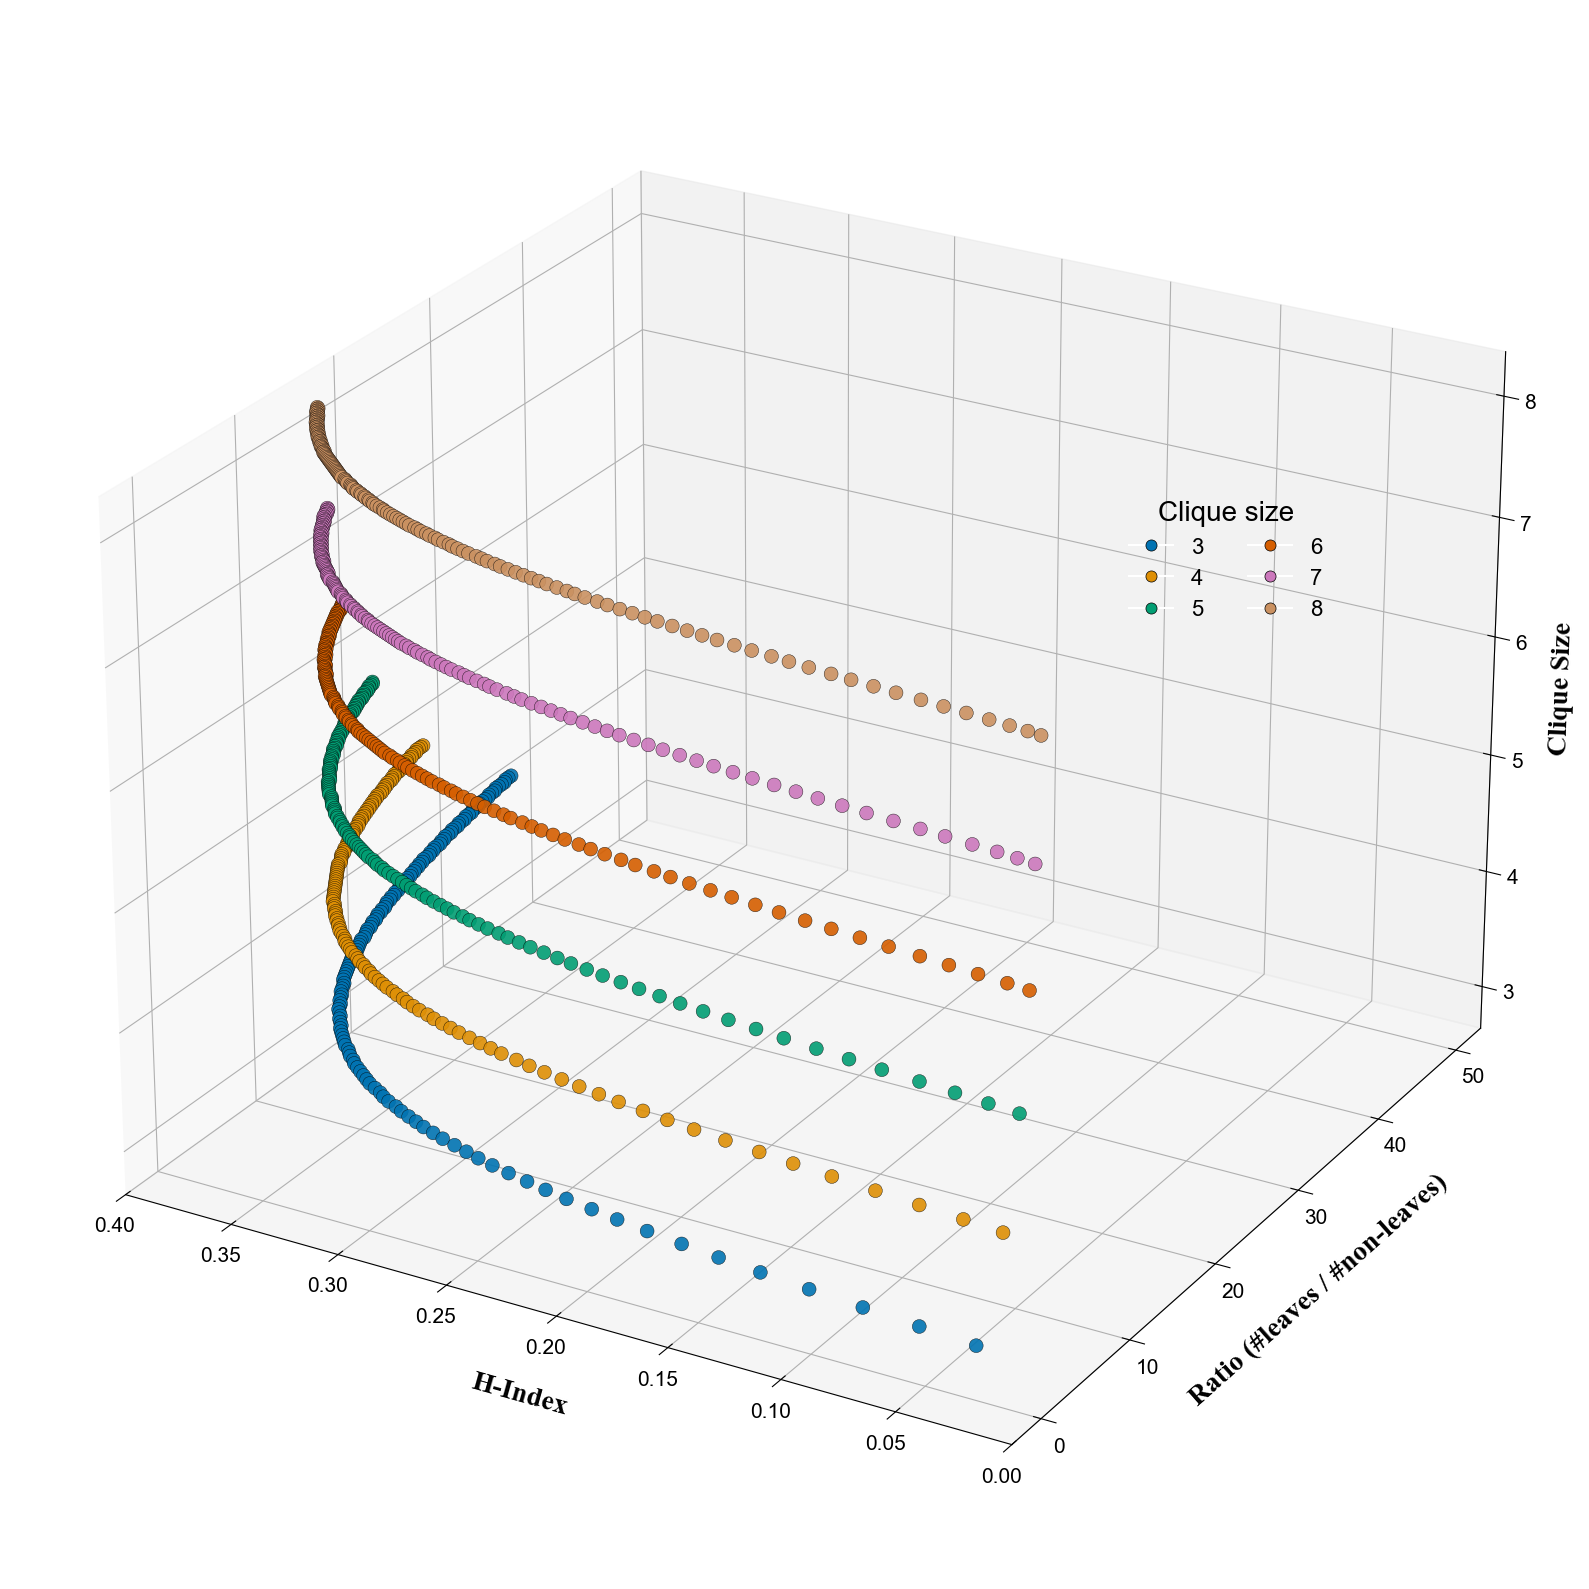

In [14]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')

xs = supernova_df_['H']
ys = supernova_df_['ratio']  # leaf / non-leaf
zs = supernova_df_['clique'] if 'clique' in supernova_df_ else supernova_df_.index  


categories = sorted(supernova_df_['clique'].unique())
palette = sns.color_palette("colorblind", n_colors=len(categories))
color_dict = {cat: palette[i] for i, cat in enumerate(categories)}
colors = supernova_df_['clique'].map(color_dict)


scatter = ax.scatter(
    xs, ys, zs,
    c=colors,
    s=100,
    edgecolor='black',
    linewidth=0.3,
    alpha=0.9
)


ax.set_xlabel('H-Index',
              fontfamily='Times New Roman',
              weight='bold',
              fontsize=20,
              labelpad=20)  

ax.set_ylabel('Ratio (#leaves / #non-leaves)',
              fontfamily='Times New Roman',
              weight='bold',
              fontsize=20,
              labelpad=20)

ax.set_zlabel('Clique Size',
              fontfamily='Times New Roman',
              weight='bold',
              fontsize=20,
              labelpad=10)



ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15)


legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'{cat}',
           markerfacecolor=color_dict[cat], markersize=8,
           markeredgecolor='black', markeredgewidth=0.5)
    for cat in categories
]

ax.legend(
    handles=legend_elements,
    title='Clique size',
    title_fontsize=20,
    fontsize=16,
    frameon=False,
    loc='upper left',
    bbox_to_anchor=(0.7, 0.7),
    ncol=2
)


ax.view_init(elev=25, azim=-60)
ax.grid(True, linestyle=':', alpha=0.4)
ax.set_xlim(left=0.4, right=0)

plt.tight_layout()
plt.savefig('Figures/supernova_clique.png', facecolor='white', dpi=1000, bbox_inches='tight')

plt.show()